In [38]:
import pandas as pd
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser

from __future__ import division

# Purpose

This notebook is meant to be one place to put all of findings about the VA.

## How To Read

If you don't know code, ignore everything in a box. 

# Reading in Data

In [39]:
# National
national_complete = pd.read_csv("Data/Wait_Time/Completed_Cleaned/National_Complete.csv")
national_pending = pd.read_csv("Data/Wait_Time/Pending_Clean/National_Pending.csv")


#used to strip time from Pending_Time
def get_date(test):
    test = test.strip('National: ')
    return parser.parse(test)

national_complete["date"] = national_complete["Complete_Time"].apply(get_date)
national_pending["date"] = national_pending["Pending_Time"].apply(get_date)
national_pending = national_pending.drop(20) #for some reason this was read in as 1989. Just dropping it

Onboard = pd.read_csv("Data/Staff_Size/Onboard_By_station_By_FY.csv").head(1).drop("ORGANIZATION",1).drop("ID",1)

choice_hires = pd.read_csv("Data/Hiring/Hiring_Clean_All_Positions.csv")

df = pd.read_csv("Data/Master/Master.csv")
df["Station"] = df["Station"].apply(str)

Station_List = ["642","512","565","508","509","544","516","546","573","675","614","621","626",
               "657","520","586","598","501","644","756","442","554","531","648","653","663","668",
               "459","612","593","600","605","691"]
mark = []
for index, row in df.iterrows():
    if row["Station"] in Station_List:
        mark.append("mark")
    else:
        mark.append("no")
df["Mark"] = mark

# Functions

In [40]:
colors = { 'mark':'red','no':'teal'}
def multiples(metric, label):
    #print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(8,9))
    ax1.set_title("Percent Increase for PC Pending")
    #ax1.set_ylabel(False)
    #ax1.set_ylabel(False)
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Pending_Increase_%", ax=ax1,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Complete_Increase_%", ax=ax2,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax2.set_title("Percent Increase for PC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Pending_Increase_%", ax=ax3,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax3.set_title("Percent Increase for SC Pending")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_Increase_%", ax=ax4,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax4.set_title("Percent Increase for SC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Pending_Increase_%", ax=ax5,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax5.set_title("Percent Increase for MH Pending")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Complete_Increase_%", ax=ax6,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax6.set_title("Percent Increase for MH Complete")
    
    df.plot(kind ='scatter',y=metric, x ="Percentage_Point_Wait_Over_30_Increase_Pending", ax=ax7,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax7.set_title("Percent Point Increase for Wait Over 30 Pending")
    
    df.plot(kind ='scatter',y=metric, x ="Percentage_Point_Wait_Over_30_Increase_Complete", ax=ax8,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax8.set_title("Percent Point Increase for Wait Over 30 Complete")
    plt.tight_layout()
    
def multiples_2014(metric):
    #print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(8,9))
    ax1.set_title("PC Pending in 2014")
    #ax1.set_ylabel(False)
    #ax1.set_ylabel(False)
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Pending_1412", ax=ax1,c=df['Mark'].apply(lambda x: colors[x]), edgecolors='none', edgecolor='none',alpha=.5)
    
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Complete_1409", ax=ax2,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax2.set_title("PC Complete in 2014")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Pending_1412", ax=ax3,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax3.set_title("SC Pending in 2014")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_1409", ax=ax4,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax4.set_title("SC Complete in 2014")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Pending_1412", ax=ax5,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax5.set_title("MH Pending in 2014")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_1409", ax=ax6,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax6.set_title("MH Complete in 2014")
    
    df.plot(kind ='scatter',y=metric, x ='%_Appts_Over_30_Pending_1412', ax=ax7,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax7.set_title("Wait Over 30 Pending in 2014")
    
    df.plot(kind ='scatter',y=metric, x ='%_Appts_Over_30_Complete_1409', ax=ax8,c=df['Mark'].apply(lambda x: colors[x]), edgecolor='none',alpha=.5)
    ax8.set_title("Wait Over 30 Complete in 2014")
    plt.tight_layout()

# Three Main Findings

* The VA did not see a large increase in staff compared to previous years.
* The new staff the VA did hire did not go to the VA stations that needed them.
* The stations that received more staff did not improve. 

# The VA did not see a large increase in staff compared to previous years

In [41]:
print "Here are the onboard employees by year."
Onboard

Here are the onboard employees by year.


MAY-FY11  MAY-FY12  MAY-FY13  MAY-FY14  MAY-FY15  MAY-FY16
0    268699  272538.0    283338    294444    307430    318560

In [42]:
increase_2014_2016 = Onboard["MAY-FY16"].item()-Onboard["MAY-FY14"].item()
increase_2014_2016_percent = round((increase_2014_2016/Onboard["MAY-FY14"].item())*100,2)
increase_2012_2014 = Onboard["MAY-FY14"].item()-Onboard["MAY-FY12"].item()
increase_2012_2014_percent = round((increase_2012_2014/Onboard["MAY-FY12"].item())*100,2)


print"Staffing went from {} in May 2014 to {} in May 2016. That's an increase of {} staffers across the VHA, or a {} percent increase.".format(
    Onboard["MAY-FY14"].item(),Onboard["MAY-FY16"].item(),increase_2014_2016, increase_2014_2016_percent)

print "2012 to 2014 saw an increase of {}, or {} percent.".format(
    increase_2012_2014, increase_2012_2014_percent)
print "That's an additional {} staff increase in 14-to-16 compared to 12-to-14, or a {} percentage point difference in the percent increase.".format(
    increase_2014_2016 - increase_2012_2014, increase_2014_2016_percent - increase_2012_2014_percent)

Staffing went from 294444 in May 2014 to 318560 in May 2016. That's an increase of 24116 staffers across the VHA, or a 8.19 percent increase.
2012 to 2014 saw an increase of 21906.0, or 8.04 percent.
That's an additional 2210.0 staff increase in 14-to-16 compared to 12-to-14, or a 0.15 percentage point difference in the percent increase.


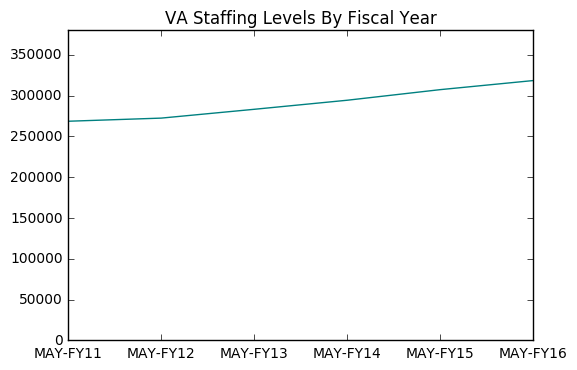

In [43]:
ax = Onboard.transpose().plot(kind="line", color="teal")
ax.set_ylim(0,380000)
ax.set_title("VA Staffing Levels By Fiscal Year")
ax.legend_.remove()

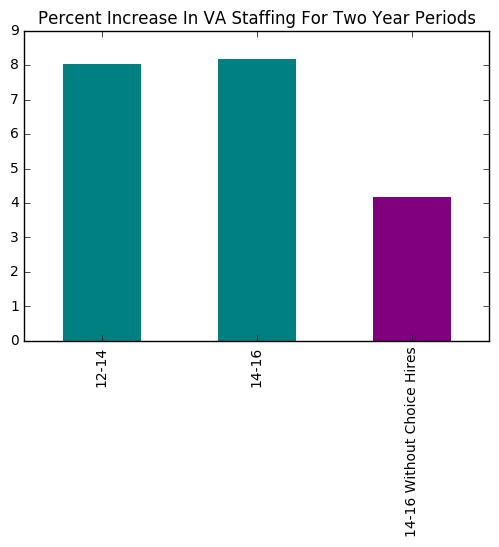

In [44]:
choice_hires_total = choice_hires["NbrEmps"].sum()
MAY_FY16_no_choice_hires = Onboard["MAY-FY16"].item() -Onboard["MAY-FY14"].item() - choice_hires_total.item()


percent_increase_dict = {}
#percent_increase_dict["11-13"] = ((Onboard["MAY-FY13"] -Onboard["MAY-FY11"])/Onboard["MAY-FY11"])*100
percent_increase_dict["12-14"] = ((Onboard["MAY-FY14"] -Onboard["MAY-FY12"])/Onboard["MAY-FY12"])*100
#percent_increase_dict["13-15"] = ((Onboard["MAY-FY15"] -Onboard["MAY-FY13"])/Onboard["MAY-FY13"])*100
percent_increase_dict["14-16"] = ((Onboard["MAY-FY16"] -Onboard["MAY-FY14"])/Onboard["MAY-FY14"])*100
percent_increase = pd.DataFrame.from_dict(percent_increase_dict)
percent_increase_dict["14-16 Without Choice Hires"] = ((Onboard["MAY-FY16"] -Onboard["MAY-FY14"]-MAY_FY16_no_choice_hires)/Onboard["MAY-FY14"])*100
percent_increase = pd.DataFrame.from_dict(percent_increase_dict)

ax = percent_increase.transpose().plot(kind="bar",color = ["teal","teal","purple"], edgecolor="none")
ax.set_title("Percent Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()

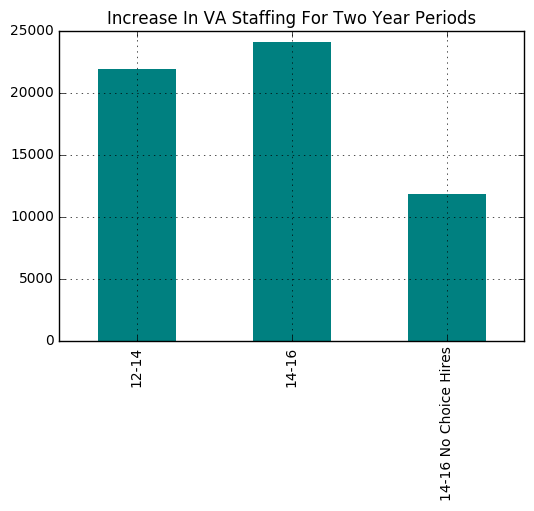

In [45]:
increase_dict = {}



#increase_dict["11-13"] = (Onboard["MAY-FY13"] - Onboard["MAY-FY11"])
increase_dict["12-14"] = (Onboard["MAY-FY14"] - Onboard["MAY-FY12"])
#increase_dict["13-15"] = (Onboard["MAY-FY15"] - Onboard["MAY-FY13"])
increase_dict["14-16"] = (Onboard["MAY-FY16"] - Onboard["MAY-FY14"])
increase_dict["14-16 No Choice Hires"] = increase_dict["14-16"] - choice_hires_total

increase = pd.DataFrame.from_dict(increase_dict)

ax = increase.transpose().plot(kind="bar",color = ["teal","teal","teal","teal","purple"], edgecolor="none")
ax.set_title("Increase In VA Staffing For Two Year Periods")
ax.legend_.remove()
ax.grid()

# How much was spent to raise the staffing level?

# The new staff the VA did hire did not go to the VA stations that needed them.

There is no correlation with choice hires and any of our metrics.


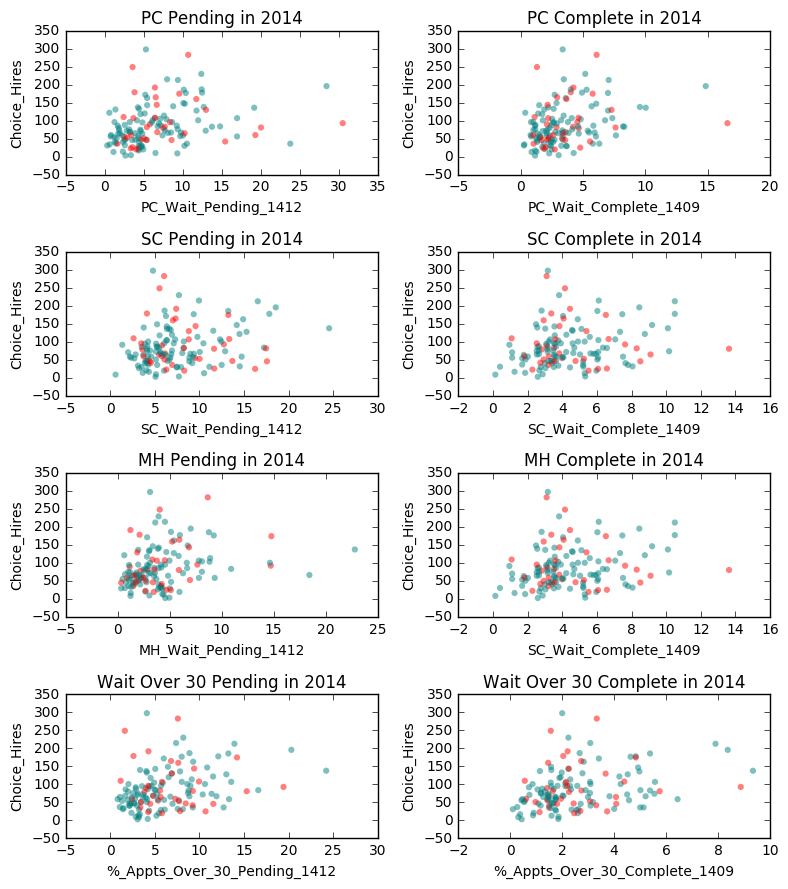

In [46]:
multiples_2014("Choice_Hires")
print "There is no correlation with choice hires and any of our metrics."

### What if we normalize based on the 2014 staffing levels?

The answer is still no.


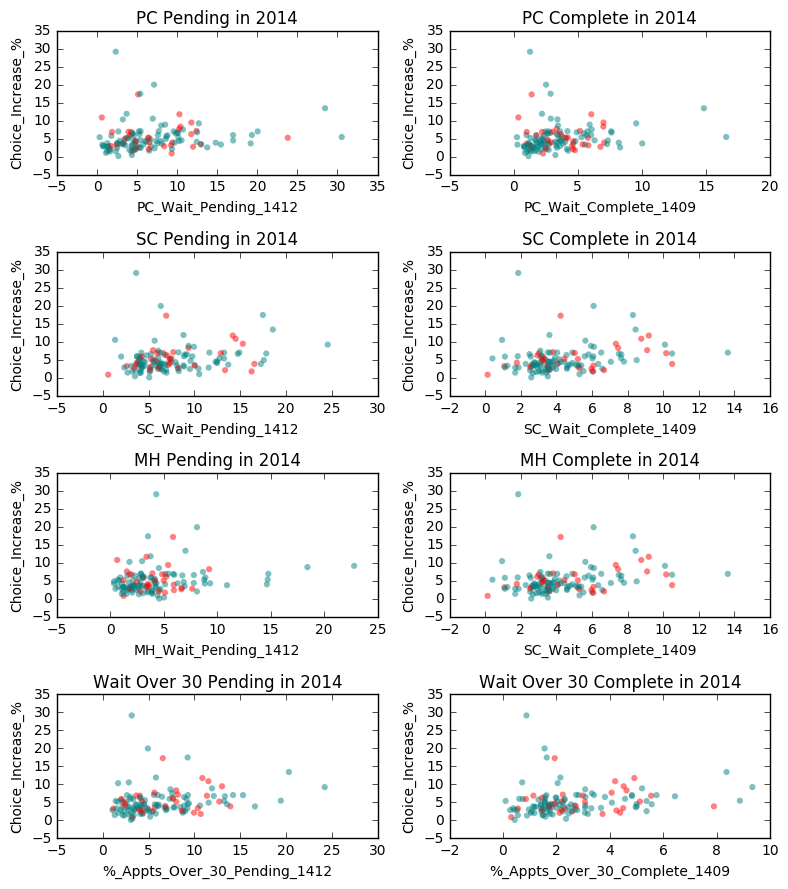

In [47]:
multiples_2014("Choice_Increase_%")
print "The answer is still no."

### What if we look at staffing level increases from 2014 to 2016

The answer is still no.


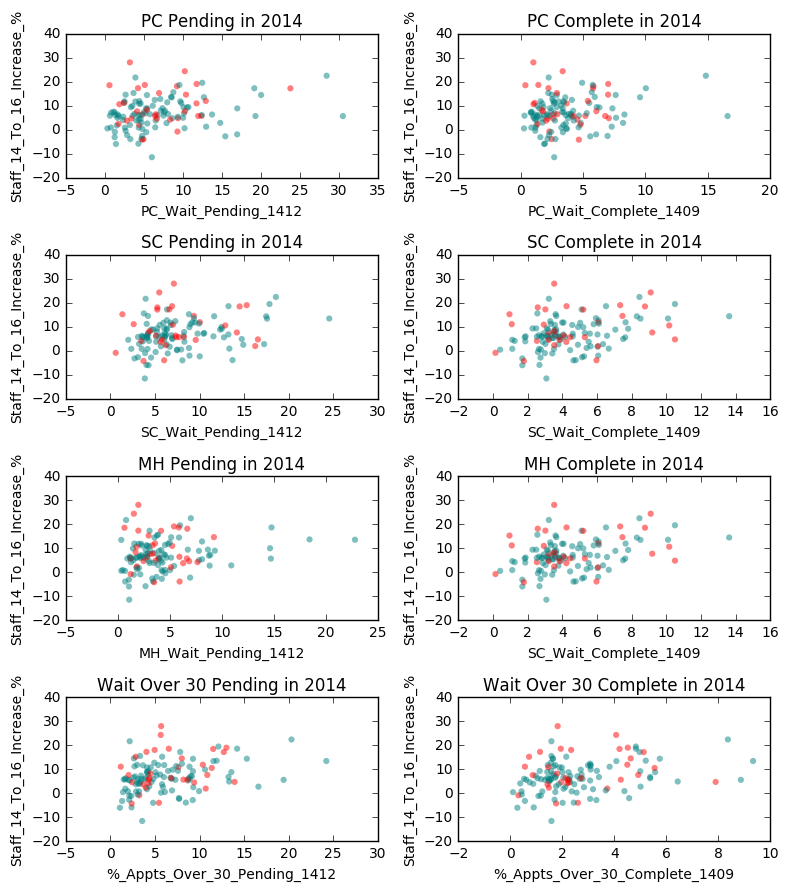

In [48]:
multiples_2014("Staff_14_To_16_Increase_%")
print "The answer is still no."

# The stations that received more staff did not improve.

There is no correlation with choice hires and any of our metrics.


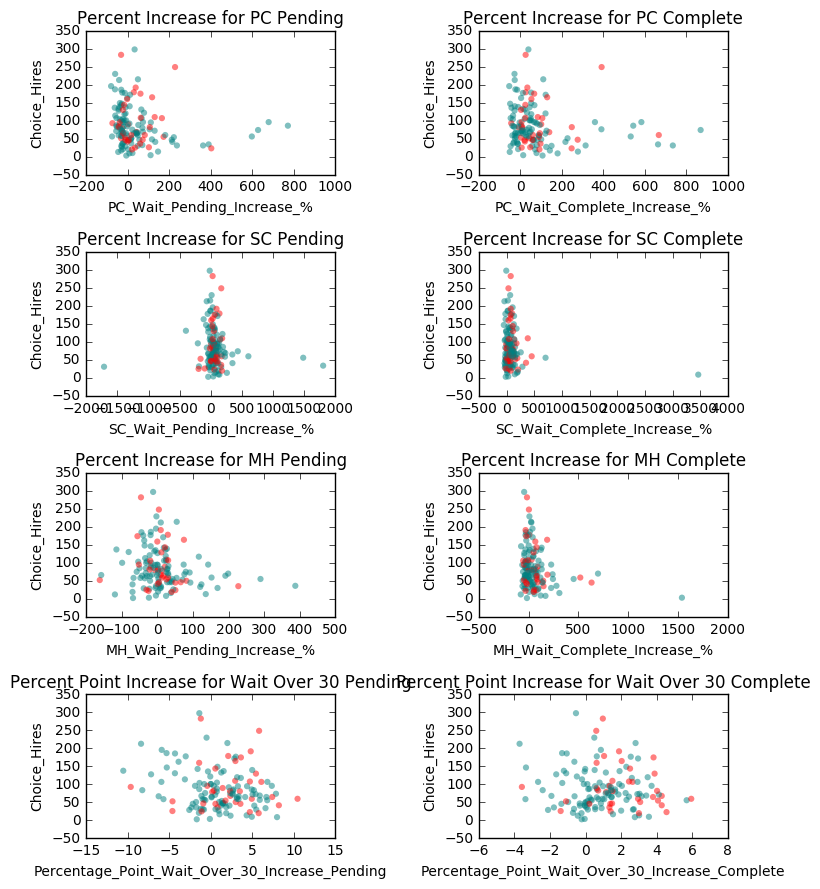

In [49]:
multiples('Choice_Hires', 'Choice Hires')
print "There is no correlation with choice hires and any of our metrics."

The answer is still no.


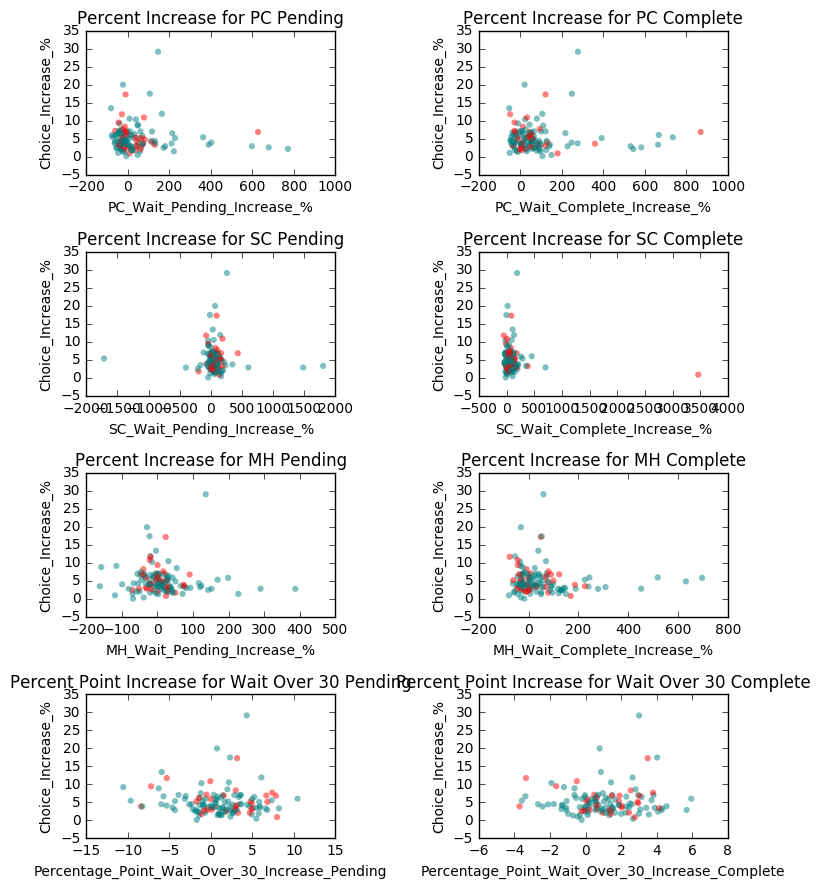

In [50]:
multiples('Choice_Increase_%', 'Choice Hires')
print "The answer is still no."

The answer is still no.


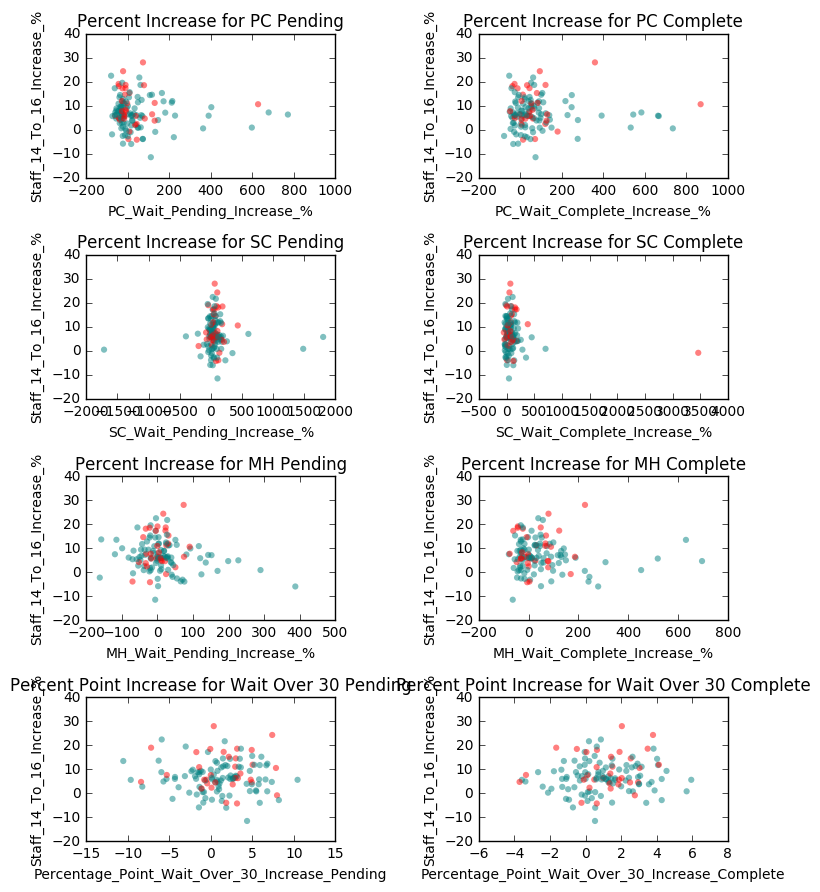

In [51]:
multiples("Staff_14_To_16_Increase_%", 'Choice Hires')
print "The answer is still no."